/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:76: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


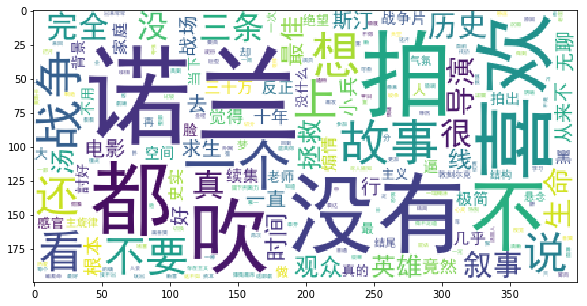

In [4]:
from urllib import request
from bs4 import BeautifulSoup as bs
import re #clear the dot..
import jieba #lexicon
import pandas as pd #statistics
import numpy # frequency
#wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
#crawling data from webpage with url
resp = request.urlopen('https://movie.douban.com/nowplaying/guangzhou/')
html_data = resp.read().decode('utf-8')
#print(html_data)

#pip3 install bs4/BeautifulSoup
#read tags for info we need
soup = bs(html_data, 'html.parser')
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')
nowplaying_list = []
for item in nowplaying_movie_list:
        nowplaying_dict = {}
        #use alt to know the movie names
        nowplaying_dict['id'] = item['data-subject']
        for tag_img_item in item.find_all('img'):
            nowplaying_dict['name'] = tag_img_item['alt']
            nowplaying_list.append(nowplaying_dict)
        #display id and name
        #print(nowplaying_list)
# comments from the film
# start=0 first comment
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[2]['id'] + '/comments' +'?' +'start=0' + '&limit=20'
resp = request.urlopen(requrl)
html_data = resp.read().decode('utf-8')
soup = bs(html_data, 'html.parser')
comment_div_lits = soup.find_all('div', class_='comment')
#comments with format
#print(comment_div_lits)

eachCommentList = [];
for item in comment_div_lits:
        if item.find_all('p')[0].string is not None:
            eachCommentList.append(item.find_all('p')[0].string)
#only comments text
#print(eachCommentList)


#clean the data
#all data become char
comments = ''
for k in range(len(eachCommentList)):
    comments = comments + (str(eachCommentList[k])).strip()
#print(comments)

#delete dot...
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)
#print(cleaned_comments)

#frequency of words
segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})
#print out high-freq words, which has no exact meanings
#print(words_df.head())

#clear useless stopwords like 'very', download txt file online
stopwords=pd.read_csv("stop_words_zh_UTF-8.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
#print(words_df.head())

# numpy count frequency
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
#print(words_stat.head())
#words cloud

wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)

wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
plt.show()
